# Heart Disease Prediction Using Supervised Learning
# (Logistic Regression, SVM, and Naive Bayes algorithms)


## Import required Python packages

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm, naive_bayes
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Import data set (collected from Kaggle.com)

In [2]:
df = pd.read_csv('heartData.csv')

## Describe and visualize data

In [21]:
# show table describing statistical makeup of each factor.
# there is some concerning data here with RestingBP and Cholesterol
# values equal to 0.  This appears to be missing data and will need to be resolved.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


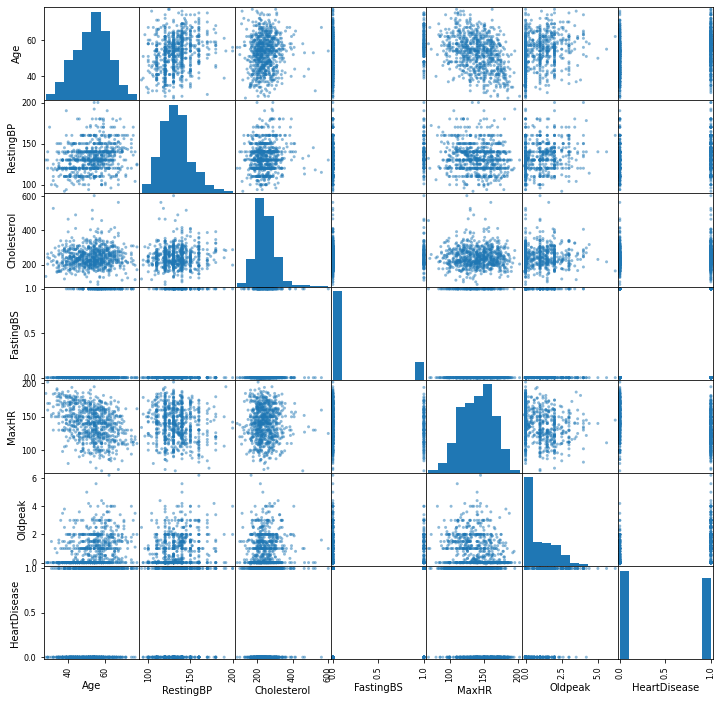

In [127]:
# show scatter plot matrix for all numeric data.
# the variables each appear to be fairly independent of each other
# therefore, all numeric variables will be used in the model development
scatter_matrix(df, figsize=(12,12))
plt.show()

In [129]:
# show correlation values for all numeric data to go with scatter plots.
# the variables each appear to be fairly independent of each other
# therefore, all numeric variables will be used in the model development
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


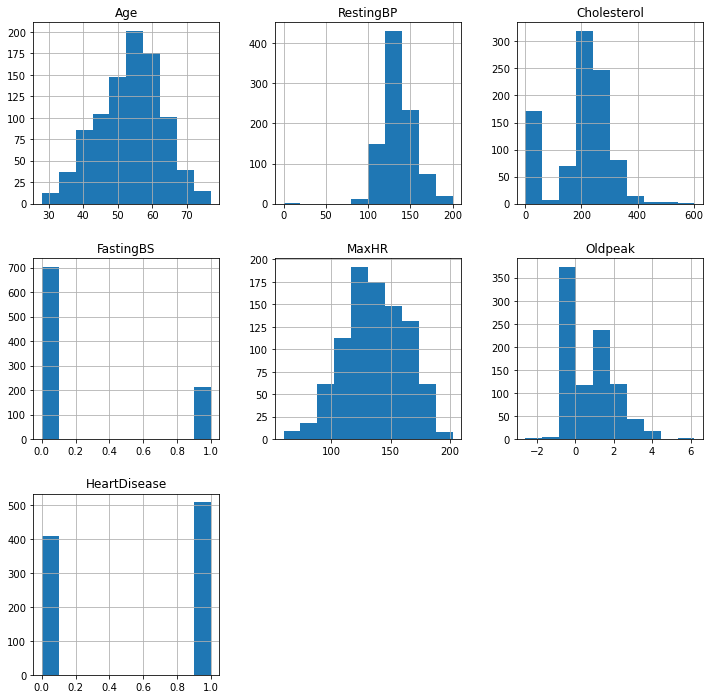

In [20]:
# show histograms for each numeric factor
# including histogram for heart disease (1 or 0)
# there appears to be a good distribution for most of the factors.
#
# the Fasting BS numbers are a bit skewed toward 0's, but will
# still be included for now.
#
# The heart disease histogram is well balanced, which should lead to 
# good results.
df.hist(figsize=(12,12))
plt.show()

## Analyze and describe non-numeric factor (Sex)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

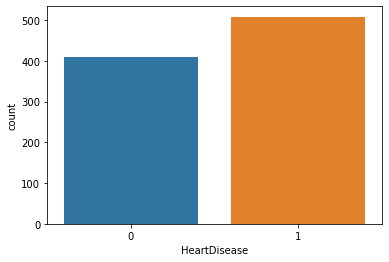

In [29]:
sns.countplot(data=df, x="HeartDisease")

<AxesSubplot:xlabel='Sex', ylabel='count'>

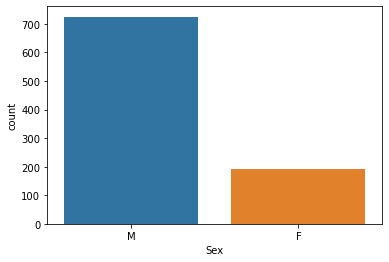

In [30]:
sns.countplot(data=df, x="Sex")

<AxesSubplot:xlabel='Sex', ylabel='count'>

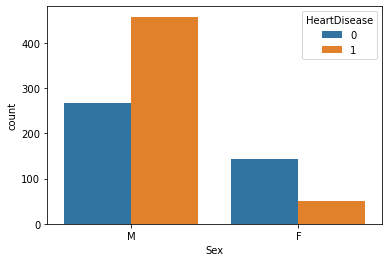

In [28]:
sns.countplot(data=df, x="Sex", hue="HeartDisease")

## Develop Preliminary Logistic Regression Model

In [43]:
# initiate model
mylog_model = linear_model.LogisticRegression()

# numeric values only, as discussed above
y = df.select_dtypes(include=np.number).values[:, 6]
X = df.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
mylog_model.fit(X_train, y_train)

# assess model peformance - can run multiple times (sometimes fails for max iterations)
# accuracy remains greater than 70%, typically around 75%
# this is adequate performance to meet objectives - try to improve with different models and by cleaning up data
y_pred = mylog_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7663043478260869


## Clean up data (delete missing data as noted above)

In [56]:
cleaned_df = df.drop(df[df['Cholesterol'] == 0].index)
cleaned_df = cleaned_df.drop(df[df['RestingBP'] == 0].index)
print(cleaned_df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

## Update Logistic Regression Model

In [116]:
# 746 entries remaining after cleaning up data, as shown above
# initiate model
log_model_updated = linear_model.LogisticRegression()

# numeric values only, as discussed above
y = cleaned_df.select_dtypes(include=np.number).values[:, 6]
X = cleaned_df.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
log_model_updated.fit(X_train, y_train)

# assess model peformance - runs more stable (no max iteration errors)
# accuracy improved slightly after cleaning up of data (ranges from 72% to 85%)
# this is adequate performance to meet objectives - see if using alternate model further improves.
y_pred = log_model_updated.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8466666666666667


## Try an SVM Model and Compare

In [81]:
# initiate model
mysvm_model = svm.SVC()

# develop model
mysvm_model.fit(X_train, y_train)

# assess model peformance
# accuracy approximately 73%, worse than logistic regression
# still adequate to meet objectives
y_pred_svm = mysvm_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svm))

0.7266666666666667


## Try Naive Bayes Model and Compare

In [90]:
# initiate model
mygnb_model = naive_bayes.GaussianNB()

# develop model
mygnb_model.fit(X_train, y_train)

# assess model peformance
# accuracy approximately 77%, potentially better than logistic regression
# adequate to meet objectives
y_pred_gnb = mygnb_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_gnb))

0.7666666666666667


## Choose Naive Bayes Model for Interactive Dashboard

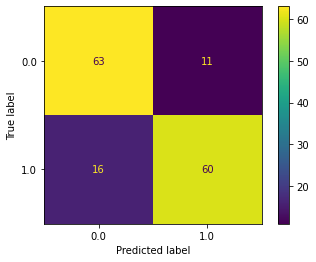

In [134]:
# view confusion matrix for further assessment of model
# nearly equal probability of false positives or false negatives.
metrics.plot_confusion_matrix(mygnb_model, X_test, y_test)

## Prepare functions for interactive dashboard

In [179]:
def proba_heart_disease(age, rBP, chol, fBS, maxHR, peak):
    if fBS == 'Yes':
        fBS = 1
    else:
        fBS = 0
    print("Probability of heart disease: ")
    print(mygnb_model.predict_proba([[age, rBP, chol, fBS, maxHR, peak]])[0,1])

In [177]:
style = {'description_width': 'initial'}
fBS_rBtn = widgets.RadioButtons(
    options = ['Yes','No'],
    description = 'Fasting Blood Sugar > 120 mg/dl',
    style=style
)
age_slider = widgets.IntSlider(min=28, max=77, step=1, description='Age',
                              style=style)
rBP_slider = widgets.IntSlider(min=92, max=200, step=1, 
                               description='Resting Blood Pressure',
                               style=style)
chol_slider = widgets.IntSlider(min=85, max=603, step=1, 
                               description='Cholesterol',
                               style=style)
maxHR_slider = widgets.IntSlider(min=69, max=202, step=1, 
                               description='Maximum Heart Rate',
                               style=style)
peak_slider = widgets.FloatSlider(min=0.0, max=6.2, step=0.1, 
                               description='Oldpeak',
                               style=style)

# -----------INTERACTIVE INTERFACE-----------

In [180]:
widgets.interact(proba_heart_disease, 
        age=age_slider,
        rBP=rBP_slider,
        chol=chol_slider,
        fBS=fBS_rBtn,
        maxHR=maxHR_slider,
        peak=peak_slider
        );

interactive(children=(IntSlider(value=28, description='Age', max=77, min=28, style=SliderStyle(description_wid…